<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Regress%C3%A3o_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


# Importando base de dados

In [2]:
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','NO_CURSO','IN_AJUDA_DEFICIENTE','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso_2 = df_curso.fillna(0)
df_curso_2.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,DIREITO,1,447,75
1,2019,1,51.0,5103403.0,CIÊNCIAS ECONÔMICAS,0,323,28
2,2019,1,51.0,5103403.0,ENGENHARIA CIVIL,0,248,45
3,2019,1,51.0,5103403.0,PEDAGOGIA,1,331,53
4,2019,1,51.0,5103403.0,SERVIÇO SOCIAL,1,274,32


# Testes regressão logistica

Text(0, 0.5, 'Concluintes')

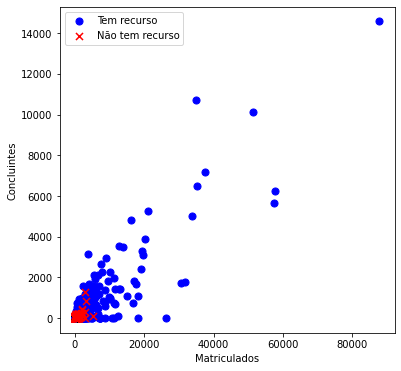

In [3]:
positive = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([1])]  
negative = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['QT_MATRICULA_TOTAL'], positive['QT_CONCLUINTE_TOTAL'], s=50, c='b', marker='o', label='Tem recurso')  
ax.scatter(negative['QT_MATRICULA_TOTAL'], negative['QT_CONCLUINTE_TOTAL'], s=50, c='r', marker='x', label='Não tem recurso')  
ax.legend()  
ax.set_xlabel('Matriculados')  
ax.set_ylabel('Concluintes') 

In [5]:
X = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X = x.reshape(-1, 1)
y = df_curso_2['QT_CONCLUINTE_TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [25]:
#logit = LogisticRegression()

In [ ]:
#logit.fit(X, y)

KeyboardInterrupt: ignored

In [21]:
X = df_curso_2[['QT_CONCLUINTE_TOTAL', 'QT_MATRICULA_TOTAL']].values
#X = X.reshape(-1, 1)
y = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

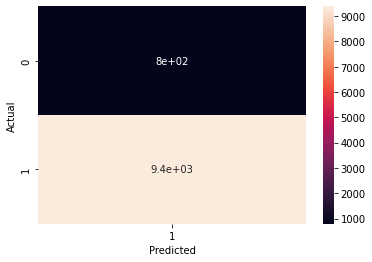

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [24]:
#Não faz o menor sentido aplicar regressão logistica com esses dados
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.921792100609157
